In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
# 필요한 모듈 설치
# 자동으로 os 는 들어가 있어서 widgets을 쓸 수 있지만 로컬 편집기에서는 import os 를 할 것
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
# fastbook의 검색 함수가 작동하는지 확인
search_images_ddg

<function fastbook.search_images_ddg>

In [ ]:
# 이미지 경로를 설정한 다음, 파일 디렉토리, name까지 설정하여 download_url()을 통해 링크, 파일에 저장한다.

ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

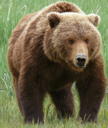

In [ ]:
# to_thumb는 해당 이미지를 픽셀에 맞춰 보여주는 함수다.
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
# 타입, 경로 지정

bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [ ]:
if not path.exists(): # 파일에 bears 라는 이름을 가진게 없다면
    path.mkdir() # 빈 디렉토리를 만든다
    for o in bear_types:  # 각기 다른 곰의 타입에 맞춰
        dest = (path/o) # 다시 새로운 디렉토리를 지정하고
        dest.mkdir(exist_ok=True) # 폴더를 만든다.
        results = search_images_ddg(f'{o} bear') # 덕덕고에서 링크들을 전부 받아
        download_images(dest, urls=results) # dest 경로에 맞춰 이미지를 다운로드한다.

In [ ]:
fns = get_image_files(path) # 모든 이미지에 대해 확인한다.
fns

(#579) [Path('bears/teddy/7cf7f281-381e-4310-8cbe-a7759b5cbd63.jpg'),Path('bears/teddy/69854c2f-6091-407e-af06-7cef54f58590.jpg'),Path('bears/teddy/85a31bc1-81b7-42cd-90cd-8df90f94a4d5.jpg'),Path('bears/teddy/d101cdf4-e384-4e17-a451-d5110a82a042.jpg'),Path('bears/teddy/883ca139-f8d6-4541-abd1-f926929f283c.jpg'),Path('bears/teddy/5d47e04f-9f16-4c1b-a0bc-8e9bd1f873f0.jpg'),Path('bears/teddy/1348f241-736a-4c62-aa37-2de0adace811.jpg'),Path('bears/teddy/6f47b727-01ee-4b07-8252-960c787b89d0.jpg'),Path('bears/teddy/0f3fbfd4-1bb1-4867-b7e8-7e96382f3ee5.jpg'),Path('bears/teddy/4fecbb53-0e41-488a-a34c-07182d60c789.png')...]

In [ ]:
failed = verify_images(fns) # 링크가 열리지 않거나, 오류가 발생한 파일들을 확인한다.
failed 

(#3) [Path('bears/teddy/e065fc72-544e-4c5f-91e0-5402e1bf3cc9.png'),Path('bears/grizzly/924a7c2c-c627-4ce3-8229-761d75d6cb14.jpg'),Path('bears/grizzly/71b04564-1b9e-428f-bd4f-36dbaab81822.jpg')]

In [ ]:
failed.map(Path.unlink); # 아마 없애는 거?

In [ ]:
bears = DataBlock( # 데이터 블록을 만든다
    blocks=(ImageBlock, CategoryBlock),  # 독립변수, 종속변수 이 데이터 블록에서는 이미지를 가지고 범주에 할당한다.
    get_items=get_image_files,  # 경로에 있는 모든 이미지 파일을 가져온다
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # 총 데이터에서 검증용 데이터 20%를 할당하고, 시드를 부여함으로 난수에 대한 재정의가 없도록 한다.
    get_y=parent_label, # 폴더의 이름에 따라 레이블 정보를 구한다.
    item_tfms=Resize(128)) # 개별 아이템의 크기를 128픽셀로 할당한다.

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5), # 파일에서 일정크기로 여러 번 잘라서 학습한다. 최소 스케일 인자로 얼마나 많은 영역을 선택하는지 결정
    batch_tfms=aug_transforms()) # 데이터 증강을 통해 학습
dls = bears.dataloaders(path) # 학습 방법까지 모두 저장하고 데이터를 얻을 경로를 인자로 줘서 데이터 로더를 만든다.

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate) # cnn_learner로 dls를 학습하는데 resnet18의 레이어를 사용하고 , 평가지표를 오차율로 정의한다.
learn.fine_tune(4) # 미세조정을 통해 에포크 4회 반복

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.980455,0.303145,0.095652,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.113643,0.243616,0.034783,00:31
1,0.085482,0.165956,0.034783,00:33
2,0.070890,0.124713,0.034783,00:31
3,0.067887,0.123150,0.034783,00:32


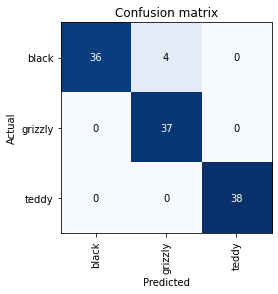

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx,cat in cleaner.change():
  print(str(path/cat)+'/moved-'+str(cleaner.fns[idx].name))
  shutil.move(str(cleaner.fns[idx]), str(path/cat)+'/moved-'+str(cleaner.fns[idx].name))

# 레이블이 새로 정의된 걸 가지고 경로로 다시 옮기는 역할을 한다. 경로가 옮겨졌으니 새롭게 datablock, loader과 학습을 다시 해야한다.

bears/black/moved-27bbedda-e75d-4155-9871-0ab94455914b.jpg
bears/grizzly/moved-7c08a20c-eb01-40b1-b73e-34b530e0e61a.jpg
bears/black/moved-694b44cb-442c-4287-80eb-478a47565a2d.jpg
bears/black/moved-432764da-4e1f-4f24-82b6-b05c12788ec3.jpg
bears/black/moved-e1f4221d-bcd2-4d6c-80a2-cb35af51c0a0.jpg
bears/grizzly/moved-f40bc7ad-4f5b-4dfe-add8-672fd3271b24.jpg
bears/black/moved-b59a1b71-3853-4bee-bc94-70217ffe9b1f.jpg
bears/black/moved-339eb83b-4c93-4603-938a-dc81fb133433.jpg
bears/black/moved-bc038f98-a570-4442-bd76-cecb3fdb126a.jpg
bears/grizzly/moved-eea072c6-b349-4b3b-8beb-8851ec8675b7.jpg
bears/black/moved-d459d89e-22d6-4e2e-a60e-252861e54423.jpg
bears/grizzly/moved-12a5b5bf-dd01-4da0-818d-37f20514df60.jpg
bears/black/moved-b09e4ba9-dace-4fff-a2ee-c24667c7a693.jpg
bears/black/moved-aa514e82-ce06-4235-984a-7dcad90eccd7.jpg
bears/black/moved-35928a0e-3242-45b6-ad73-a1b7a7870d5e.jpg
bears/grizzly/moved-7a0fe782-def0-4aad-8d8e-8e0891568c94.jpg
bears/black/moved-a76b4582-238c-4cbc-974c-b0f2

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

# 뭐가 망했는지 오차율이 늘어났다 아마 곰의 재지정을 잘못한 듯

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.026945,0.134667,0.052174,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.144444,0.105257,0.026087,00:33
1,0.127982,0.097704,0.034783,00:33
2,0.099459,0.129139,0.052174,00:31
3,0.079299,0.132399,0.052174,00:31


In [ ]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 33.2 MB/s 
     |████████████████████████████████| 344 kB 66.4 MB/s 
     |████████████████████████████████| 132 kB 57.6 MB/s 
     |████████████████████████████████| 70 kB 10.6 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 561 kB 47.6 MB/s 
     |████████████████████████████████| 112 kB 69.9 MB/s 
     |████████████████████████████████| 423 kB 61.5 MB/s 
     |████████████████████████████████| 80 kB 12.4 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 133 kB 76.9 MB/s 
  Created wheel for json5: filename=json5-0.9.8-py2.py3-none-any.whl size=18604 sha256=21c5f729d3019da6a72958d8afeebb75febe12b45748625bda7ae2c26de9b0e5
  Stored in directory: /root/.cache/pip/wheels/ac/9b/de/6e4fd8f159d3dfa42c42ceddf2184fda29ea7fb1e8f5f8371c
Successful

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila  OK


In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
learn.export() # 모듈과 파라미터를 반환하는 pkl 파일을 저장한다.

In [ ]:
path = Path()
path.ls(file_exts='.pkl') # 해당 파일이 존재하는지 확인

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

learn_inf.predict('images/grizzly.jpg')

# ('grizzly', TensorBase(1), TensorBase([6.7367e-06, 9.9999e-01, 3.5326e-08]))
# 예측한 값, 범주 내에서 속하는 값, 각 범주에서 예측한 확률

# 범주 확인 learn_inf.dls.vocab

('grizzly', TensorBase(1), TensorBase([6.7367e-06, 9.9999e-01, 3.5326e-08]))

In [ ]:
img = PILImage.create(btn_upload.data[-1])

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl : display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred, pred_idx, probs = learn_inf.predict(img)

lbl_pred = widgets.Label()
lbl_pred.value = f'예측 : {pred}; 확률 : {probs[pred_idx]:.04f}'
lbl_pred

Label(value='예측 : grizzly; 확률 : 1.0000')

In [ ]:
btn_run = widgets.Button(description = 'Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl : display(img.to_thumb(128, 128))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f'예측 : {pred}; 확률 : {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')